<a href="https://colab.research.google.com/github/carive47/Finances/blob/main/technical_forecasting/analisis_tesla_ecopetrol_btc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **librerias**

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
pip install mplfinance

     |████████████████████████████████| 70 kB 3.2 MB/s 


In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28908 sha256=65fa07a57e03544dc905975fcc4000ba224f54b7febacf9fec49062c39a35e41
  Stored in directory: /root/.cache/pip/wheels/72/78/64/cc1c01506a1010a9845e9bd7c69333730f7174661228ea4f98
Successfully built ta


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
 # libreria de velas japonesas

import mplfinance as mpf

#libreria de analisis técnico
import ta


In [ ]:
# descargar datos de TEsla
df1 = yfin.download('TSLA', start = '2021-01-01', end='2023-01-02')
df1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500
...,...,...,...,...,...,...
2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400
2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600
2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300


In [ ]:
# portafolio de mercado SP500
df2 = yfin.download('^GSPC', start = '2021-01-01', end='2023-01-02')
df2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000
...,...,...,...,...,...,...
2022-03-15,4188.819824,4271.049805,4187.899902,4262.450195,4262.450195,4331170000
2022-03-16,4288.140137,4358.899902,4251.990234,4357.859863,4357.859863,5002240000
2022-03-17,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4174170000


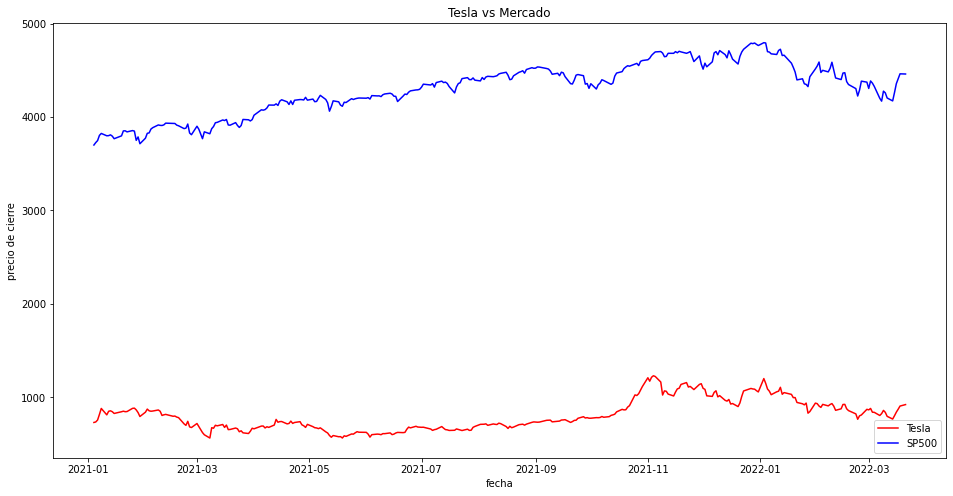

In [ ]:
#grafico precios de cierre
plt.figure(figsize=(16,8))
plt.title('Tesla vs Mercado')
plt.xlabel('fecha')
plt.ylabel('precio de cierre')
plt.plot(df1['Close'], color = 'red')
plt.plot(df2['Close'], color = 'blue')
plt.legend(['Tesla','SP500'], loc ='lower right')
plt.show()

In [ ]:
# EScalar a un valor de 100 USD]
df1['cierre_100']= (100/df1['Close'][0]*df1['Close'])
df2['cierre_100']= (100/df2['Close'][0]*df2['Close'])
df1

,Open,High,Low,Close,Adj Close,Volume,cierre_100
Date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200,100.000000
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,100.731733
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,103.591537
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,111.821527
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,120.588678
...,...,...,...,...,...,...,...
2022-03-15,775.270020,805.570007,756.570007,801.890015,801.890015,22280400,109.882565
2022-03-16,809.000000,842.000000,802.260010,840.229980,840.229980,28009600,115.136270
2022-03-17,830.989990,875.000000,825.719971,871.599976,871.599976,22194300,119.434884


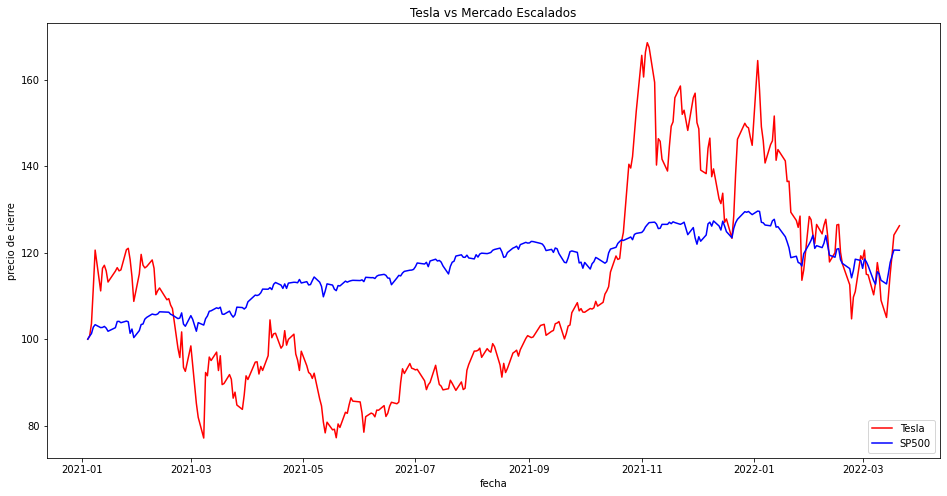

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Tesla vs Mercado Escalados')
plt.xlabel('fecha')
plt.ylabel('precio de cierre')
plt.plot(df1['cierre_100'], color = 'red')
plt.plot(df2['cierre_100'], color = 'blue')
plt.legend(['Tesla','SP500'], loc ='lower right')
plt.show()

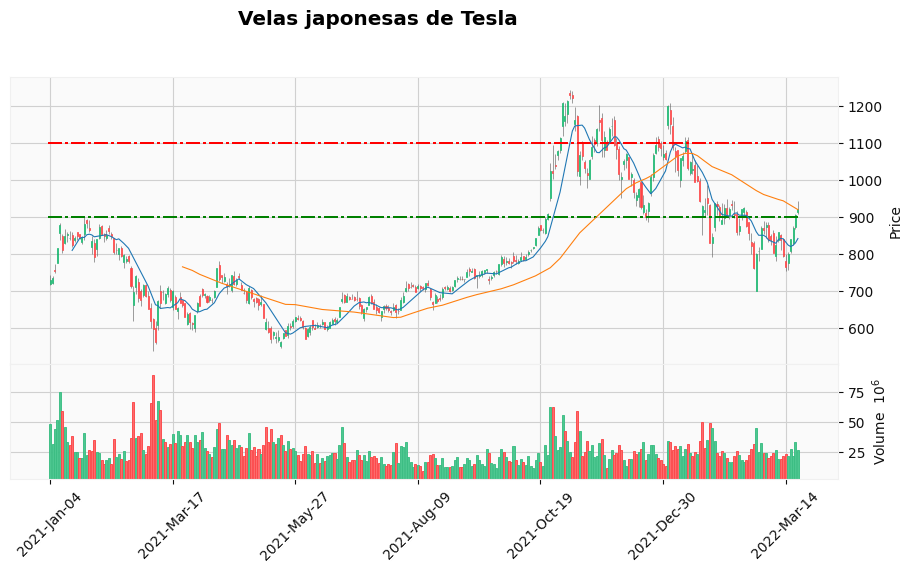

In [ ]:
# diagrama de velas japonesas

mpf.plot(df1,
         type = 'candle',
         volume = True,
         hlines = dict (hlines=[1100,900], colors=['red','green'], linestyle = '-.'),
         figratio = (16,8),
         mav=(10,55),
         style = 'yahoo',
         title = 'Velas japonesas de Tesla')

# **INICIO DE PRUEBA**

In [ ]:
dfc = yfin.download('CX',start='2020-01-01', end= '2021-01-01')
dfc


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3.81,3.88,3.80,3.84,3.84,2661900
2020-01-03,3.78,3.85,3.77,3.80,3.80,2861600
2020-01-06,3.78,3.84,3.76,3.84,3.84,3012600
2020-01-07,3.84,3.84,3.72,3.76,3.76,5000600
2020-01-08,3.78,3.87,3.76,3.84,3.84,3804800
...,...,...,...,...,...,...
2020-12-24,5.16,5.19,5.06,5.14,5.14,2506000
2020-12-28,5.10,5.17,5.07,5.10,5.10,2432000
2020-12-29,5.10,5.20,5.08,5.09,5.09,5138900


In [ ]:
dfe = yfin.download('EC',start='2020-01-01', end= '2021-01-01')
dfe

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,20.15,20.410000,20.150000,20.309999,18.459724,264900
2020-01-03,20.59,20.700001,20.360001,20.480000,18.614239,682700
2020-01-06,20.50,20.530001,20.280001,20.400000,18.541525,397200
2020-01-07,20.32,20.580000,20.270000,20.500000,18.632418,559200
2020-01-08,20.26,20.540001,20.200001,20.340000,18.486994,1498200
...,...,...,...,...,...,...
2020-12-24,13.17,13.170000,12.900000,12.980000,12.885998,250300
2020-12-28,13.02,13.170000,12.870000,12.970000,12.876070,630000
2020-12-29,13.09,13.120000,12.920000,13.090000,12.995201,590700


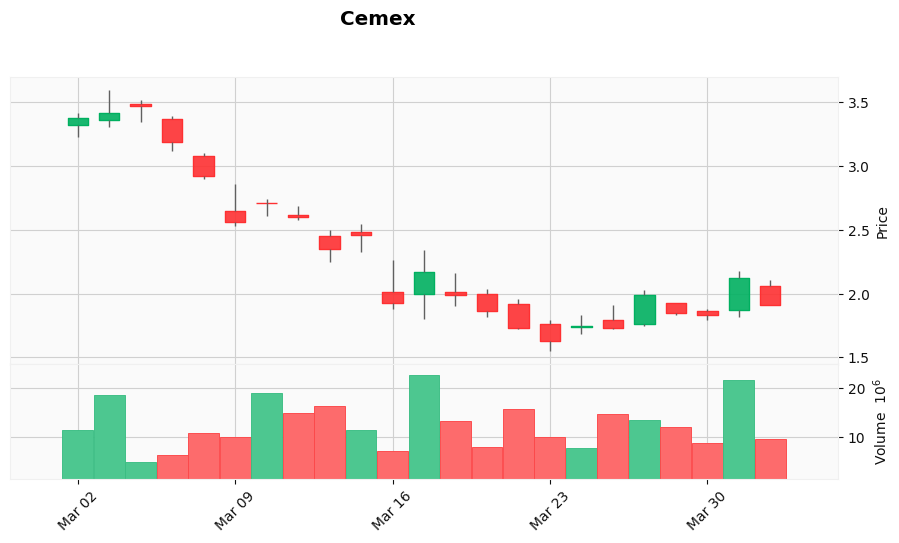

In [ ]:
mpf.plot(dfc['2020-03-01':'2020-04-01'],
         type = 'candle',
         volume = True,
         figratio = (16,8),
         #mav=(10,55),
         style = 'yahoo',
         title = 'Cemex')

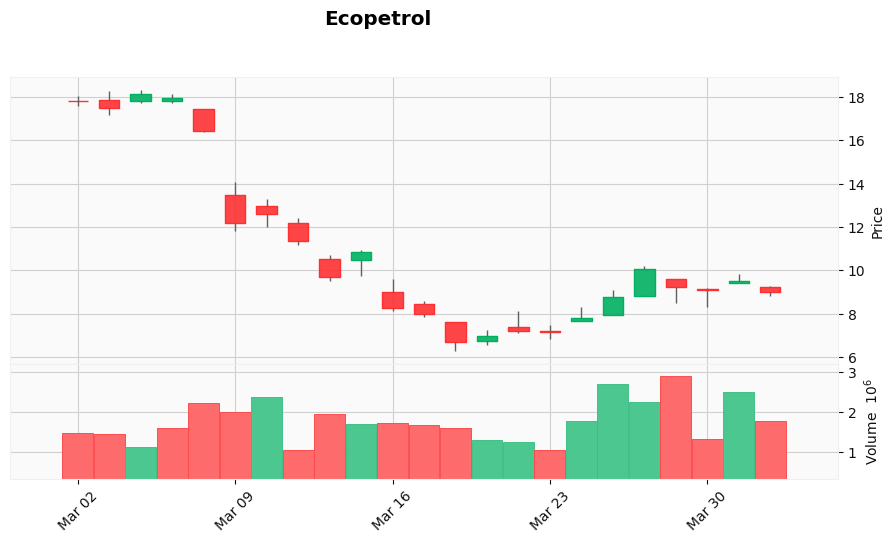

In [ ]:
mpf.plot(dfe['2020-03-01':'2020-04-01'],
         type = 'candle',
         volume = True,
         figratio = (16,8),
         #mav=(10,55),
         style = 'yahoo',
         title = 'Ecopetrol')

In [ ]:
#datos en intervalos de 1H
dfe1 = yfin.download('EC', start='2021-03-13', end='2021-03-23', interval='1h')
dfe1

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-03-15 09:30:00-04:00,13.550,13.5500,13.3400,13.475,13.475,309363
2021-03-15 10:30:00-04:00,13.470,13.5250,13.4300,13.510,13.510,273972
2021-03-15 11:30:00-04:00,13.510,13.6100,13.4300,13.595,13.595,325836
2021-03-15 12:30:00-04:00,13.595,13.7800,13.5900,13.755,13.755,169942
2021-03-15 13:30:00-04:00,13.750,13.9050,13.7450,13.870,13.870,312754
2021-03-15 14:30:00-04:00,13.870,13.9000,13.8100,13.885,13.885,193689
2021-03-15 15:30:00-04:00,13.890,14.0400,13.8900,14.040,14.040,406170
2021-03-16 09:30:00-04:00,13.850,14.0027,13.8100,13.940,13.940,228437
2021-03-16 10:30:00-04:00,13.940,13.9400,13.8150,13.825,13.825,75816
2021-03-16 11:30:00-04:00,13.825,13.8700,13.7900,13.850,13.850,276157


# **ANALISIS TECNICO**

---
\


In [ ]:
dfb = yfin.download('BTC-USD', start='2020-07-01', end='2021-07-01')
dfb

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044


## **EMAs**

In [ ]:
#SMA 5 dias
dfb['SMA5'] = dfb['Adj Close'].rolling(window=5).mean()
dfb['SMA20'] = dfb['Adj Close'].rolling(window=20).mean()
dfb

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA20
Date,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN
...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523


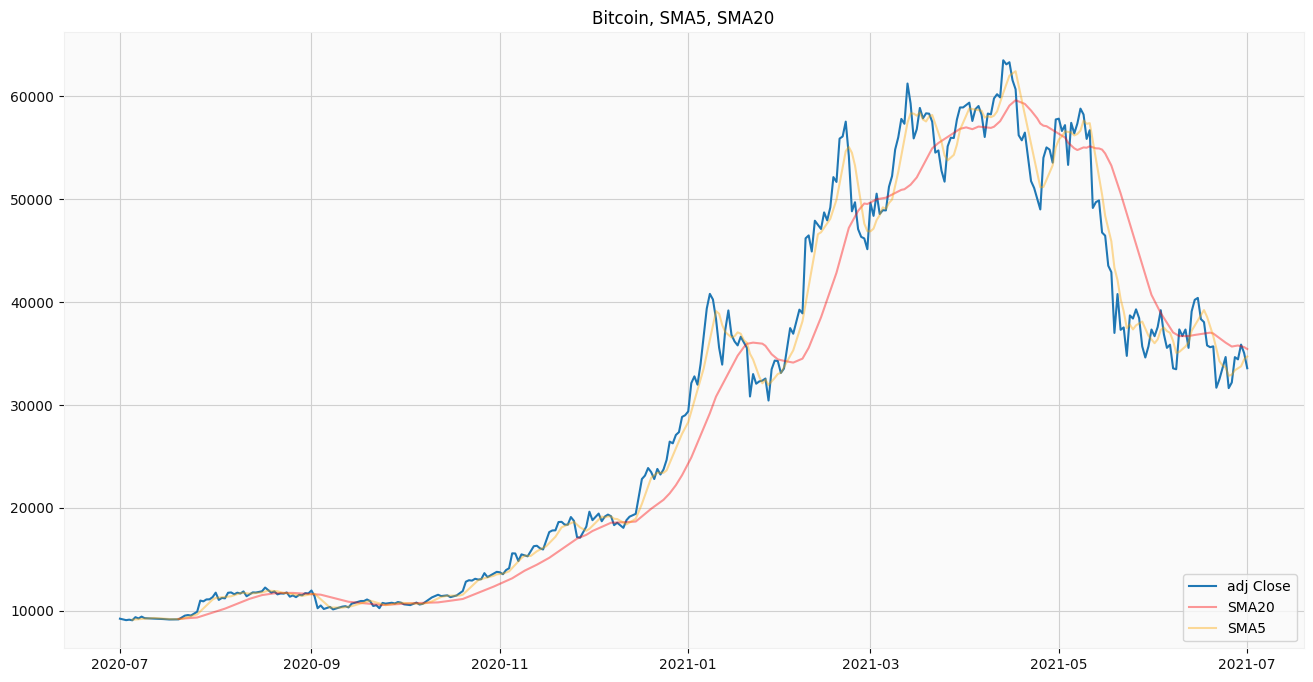

In [ ]:
#grafico con SMA
from IPython.core.pylabtools import figsize
plt.figure(figsize(16,8))
plt.title('Bitcoin, SMA5, SMA20')
plt.plot(dfb['Adj Close'])
plt.plot(dfb['SMA20'], color ='red', alpha = 0.4)
plt.plot(dfb['SMA5'], color='orange', alpha = 0.4)
plt.legend(['adj Close','SMA20','SMA5'], loc='lower right')
plt.show()

In [ ]:
# medias exponenciales
#ema 5
dfb['EMA5'] = dfb['Adj Close'].ewm(span = 5, adjust = False).mean()
#ema20
dfb['EMA20'] = dfb['Adj Close'].ewm(span=20, adjust = False).mean()

dfb

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA20,EMA5,EMA20
Date,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455
...,...,...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969706
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099823
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523,34507.922003,35291.735777


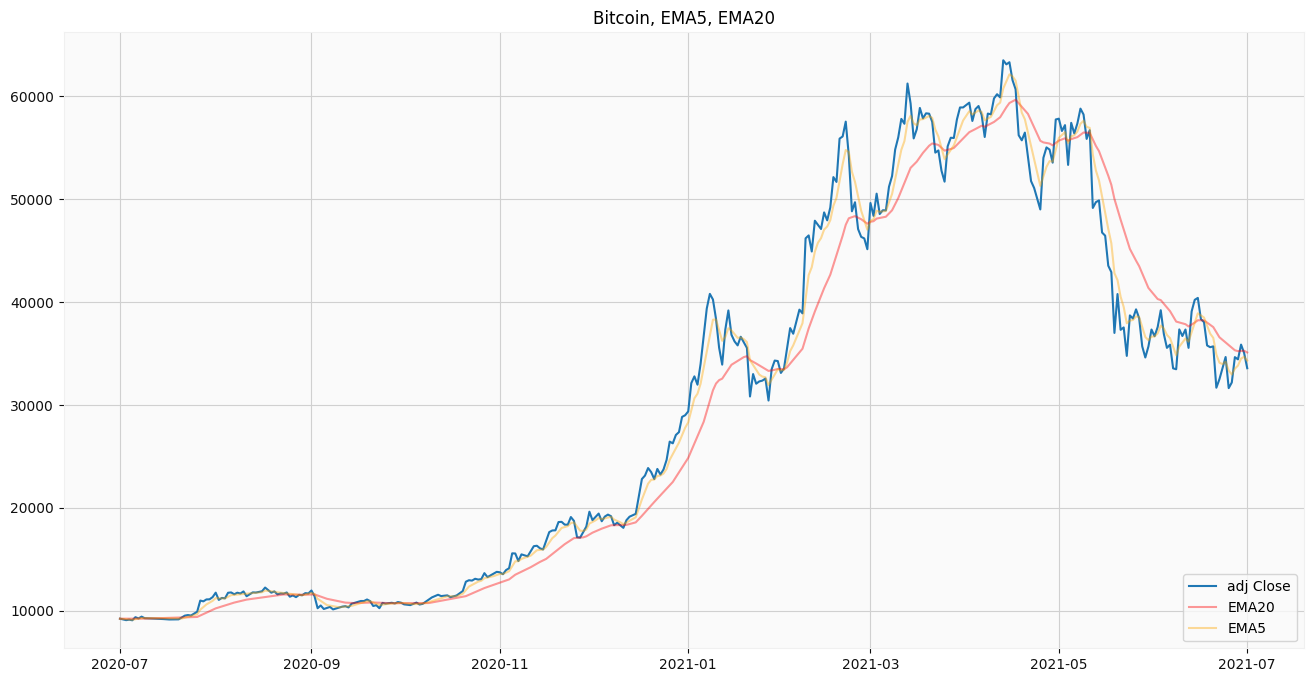

In [ ]:
# grafico con EMA
from IPython.core.pylabtools import figsize
plt.figure(figsize(16,8))
plt.title('Bitcoin, EMA5, EMA20')
plt.plot(dfb['Adj Close'])
plt.plot(dfb['EMA20'], color ='red', alpha = 0.4)
plt.plot(dfb['EMA5'], color='orange', alpha = 0.4)
plt.legend(['adj Close','EMA20','EMA5'], loc='lower right')
plt.show()

## **Bollinger bands**

In [ ]:
#Boolinger Bands
bb = ta.volatility.BollingerBands(close=dfb['Close'], window=20, window_dev=2)
dfb['BOL_m']= bb.bollinger_mavg()
dfb['BOL_H']= bb.bollinger_hband()
dfb['BOL_L']= bb.bollinger_lband()
dfb

,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA20,EMA5,EMA20,BOL_m,BOL_H,BOL_L
Date,,,,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195,NaN,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287,NaN,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280,NaN,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042,NaN,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969706,35733.668555,41012.715513,30454.621597
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099823,35781.753711,40994.649699,30568.857723
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523,34507.922003,35291.735777,35707.886523,40871.714138,30544.058909


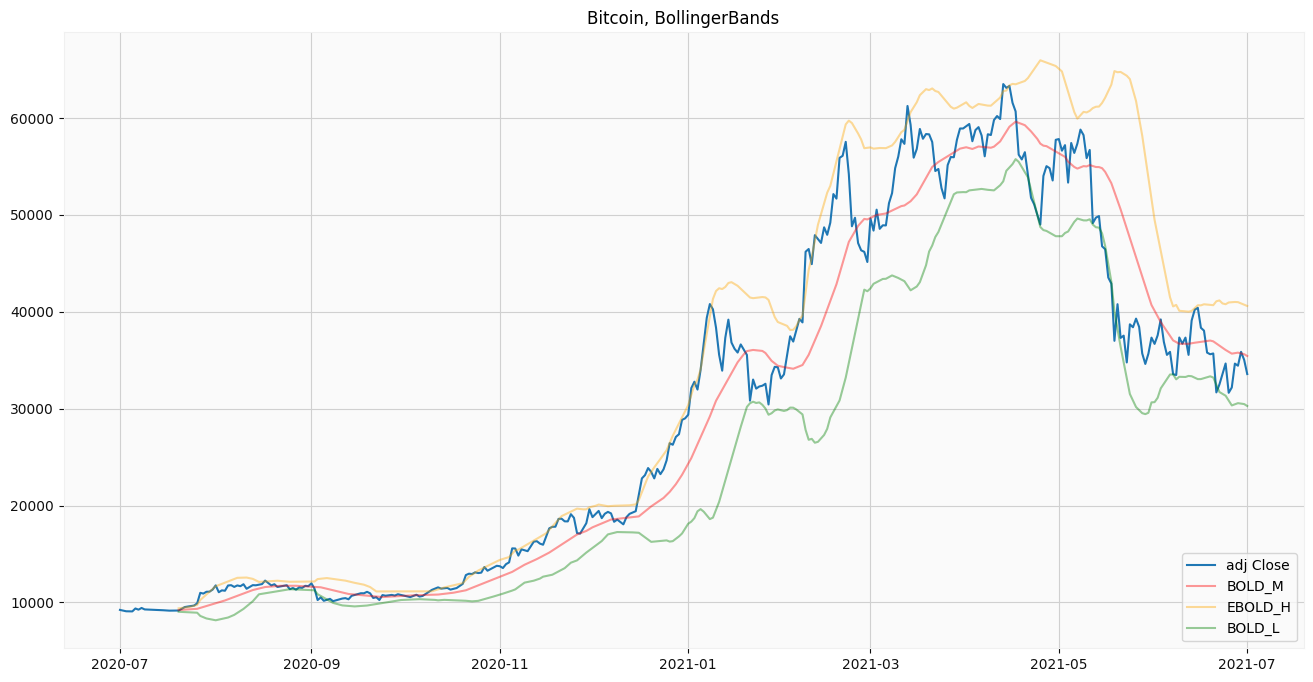

In [ ]:
# grafico con BB

plt.figure(figsize(16,8))
plt.title('Bitcoin, BollingerBands')
plt.plot(dfb['Adj Close'])
plt.plot(dfb['BOL_m'], color ='red', alpha = 0.4)
plt.plot(dfb['BOL_H'], color='orange', alpha = 0.4)
plt.plot(dfb['BOL_L'], color='green', alpha = 0.4)
plt.legend(['adj Close','BOLD_M','EBOLD_H','BOLD_L'], loc='lower right')
plt.show()

## **MACD**

In [ ]:
#MACD

dfb['MACD'] = ta.trend.MACD(close=dfb['Adj Close'], window_fast=12, window_slow=26).macd()
dfb


,Open,High,Low,Close,Adj Close,Volume,SMA5,SMA20,EMA5,EMA20,BOL_m,BOL_H,BOL_L,MACD
Date,,,,,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195,NaN,NaN,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287,NaN,NaN,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280,NaN,NaN,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042,NaN,NaN,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969706,35733.668555,41012.715513,30454.621597,-1733.088279
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099823,35781.753711,40994.649699,30568.857723,-1598.847804
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523,34507.922003,35291.735777,35707.886523,40871.714138,30544.058909,-1361.104552


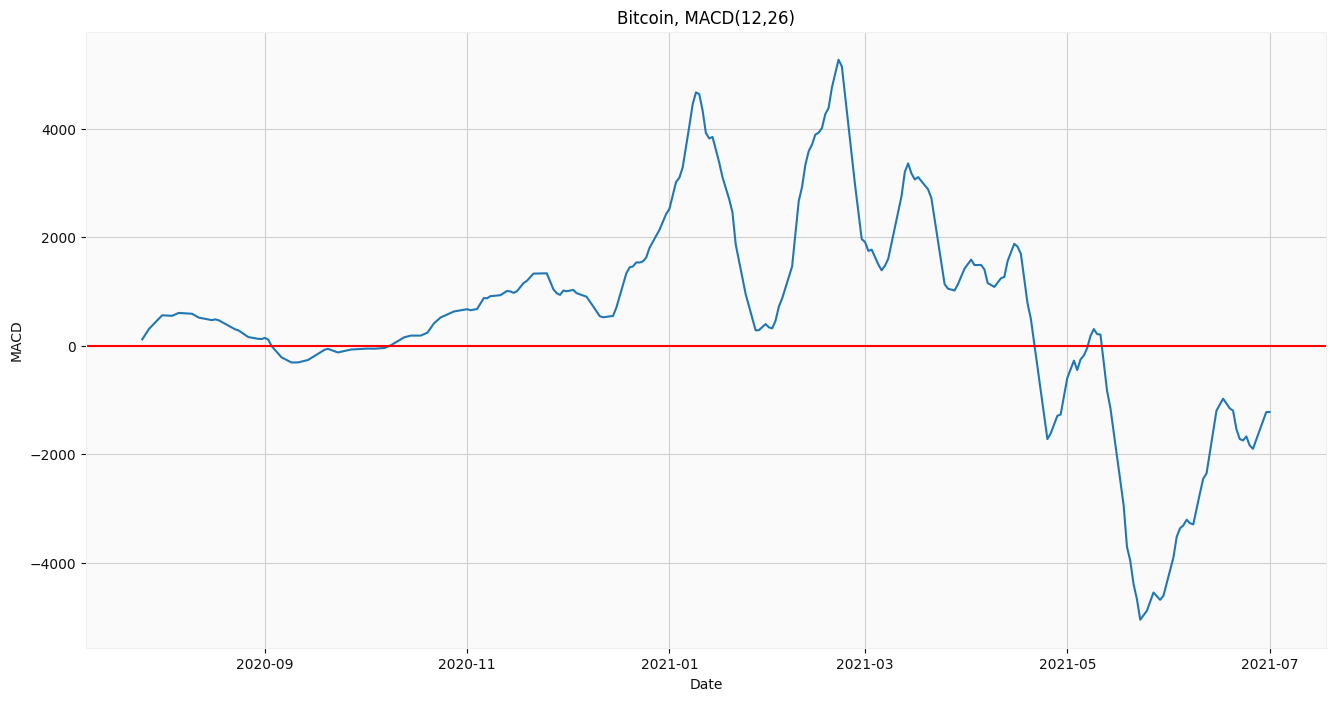

In [ ]:
# grafico con MACD

plt.figure(figsize(16,8))
plt.title('Bitcoin, MACD(12,26)')
plt.plot(dfb['MACD'])
plt.axhline(y=0, color = 'red')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.show()

## **Fibonacci**

In [ ]:
# REtrocesos de Fibonacci
max_p = dfb['Adj Close'].max()
min_p = dfb['Adj Close'].min()
dif_p = max_p - min_p
r_fibo = np.array([0.236, 0.382, 0.5, 0.618])

levels = max_p - dif_p * r_fibo
levels

array([50658.09157422, 42711.38243555, 36288.69970703, 29866.01697852])

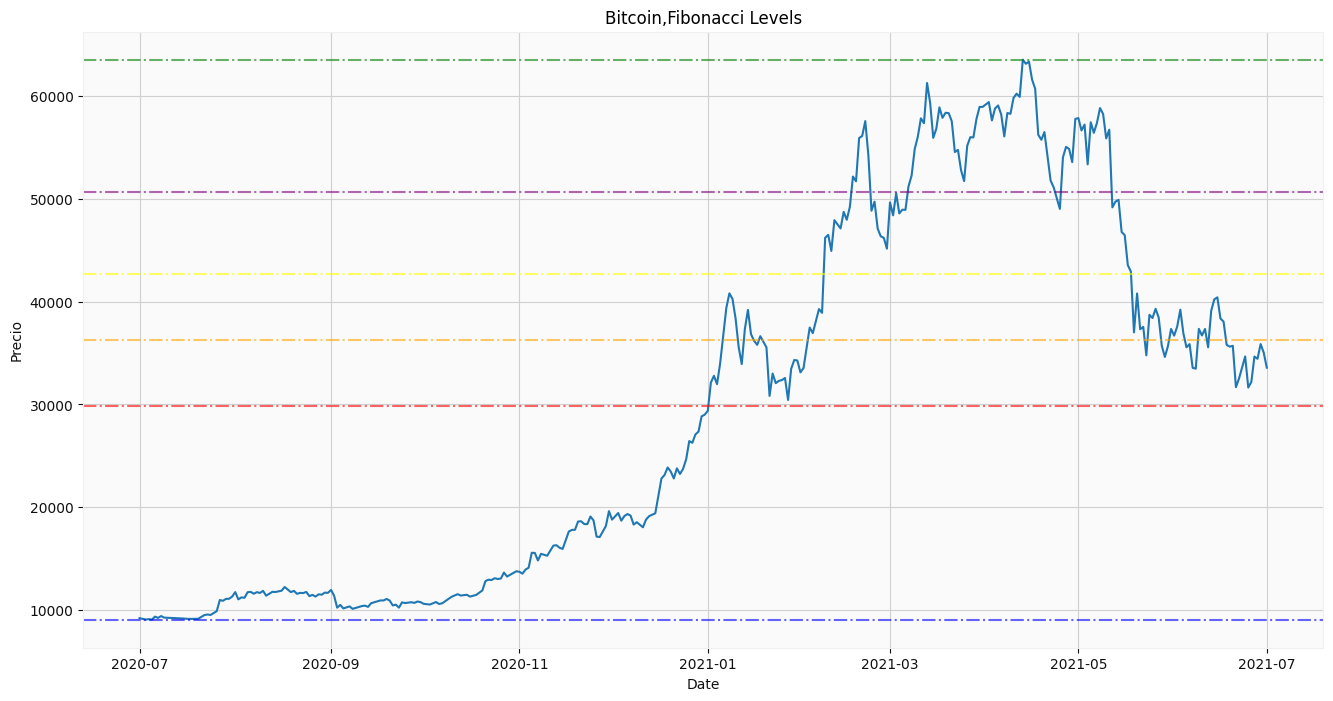

In [ ]:
# grafico con Fibonacci
plt.figure(figsize(16,8))
plt.title('Bitcoin,Fibonacci Levels')
plt.plot(dfb['Close'])
plt.axhline(y=max_p, color = 'green', linestyle='-.', alpha = 0.6)
plt.axhline(y=min_p, color = 'blue', linestyle='-.', alpha = 0.6)
plt.axhline(y=50658.09157422, color = 'purple', linestyle='-.', alpha = 0.6)
plt.axhline(y=42711.38243555, color = 'yellow', linestyle='-.', alpha = 0.6)
plt.axhline(y=36288.69970703, color = 'orange', linestyle='-.', alpha = 0.6)
plt.axhline(y=29866.01697852, color = 'red', linestyle='-.', alpha = 0.6)
plt.ylabel('Precio')
plt.xlabel('Date')
plt.show()

In [ ]:
dft=yfin.download('ITCB', start='2021-03-9', end = '2021-04-25')
dft

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-09,5.18,5.20,5.11,5.17,4.891959,105300
2021-03-10,5.27,5.41,5.26,5.41,5.119051,23500
2021-03-11,5.51,5.83,5.51,5.83,5.516464,68400
2021-03-12,5.86,5.95,5.75,5.82,5.507002,32700
2021-03-15,6.06,6.15,5.99,6.12,5.790868,42000
2021-03-16,6.09,6.14,5.96,6.14,5.809793,76300
2021-03-17,6.00,6.09,5.90,5.98,5.658397,39000
2021-03-18,6.03,6.10,5.93,5.96,5.639473,56200
2021-03-19,5.88,5.89,5.55,5.86,5.544851,74200


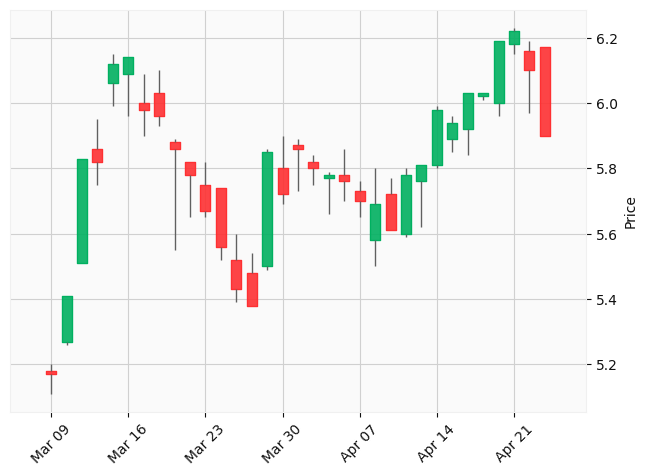

In [ ]:
mpf.plot(dft,
         type='candle',
         style='yahoo')

#** **ANALISIS TÉCNICO II - señales** **


## **intro**

In [ ]:
# automatizar señaeles de compra o venta

#datos
import pandas_datareader as pdr

In [ ]:
#extraer datos de la reserva federal
dfbr = pdr.get_data_fred('DCOILBRENTEU', start='2019-01-01', end = '2020-01-01')
dfbr = dfbr.dropna()
dfbr.columns = ['close']
dfbr

,close
DATE,
2019-01-02,54.06
2019-01-03,53.23
2019-01-04,55.64
2019-01-07,57.10
2019-01-08,56.91
...,...
2019-12-24,69.26
2019-12-26,69.26
2019-12-27,68.91


In [ ]:
# Construccion de EMAs
dfbr['EMA5'] = dfbr['close'].ewm(span=5, adjust= False).mean()
dfbr['EMA20']= dfbr['close'].ewm(span=20 , adjust= False).mean()
dfbr

,close,EMA5,EMA20
DATE,,,
2019-01-02,54.06,54.060000,54.060000
2019-01-03,53.23,53.783333,53.980952
2019-01-04,55.64,54.402222,54.138957
2019-01-07,57.10,55.301481,54.420961
2019-01-08,56.91,55.837654,54.658012
...,...,...,...
2019-12-24,69.26,68.604699,66.891005
2019-12-26,69.26,68.823133,67.116624
2019-12-27,68.91,68.852089,67.287421


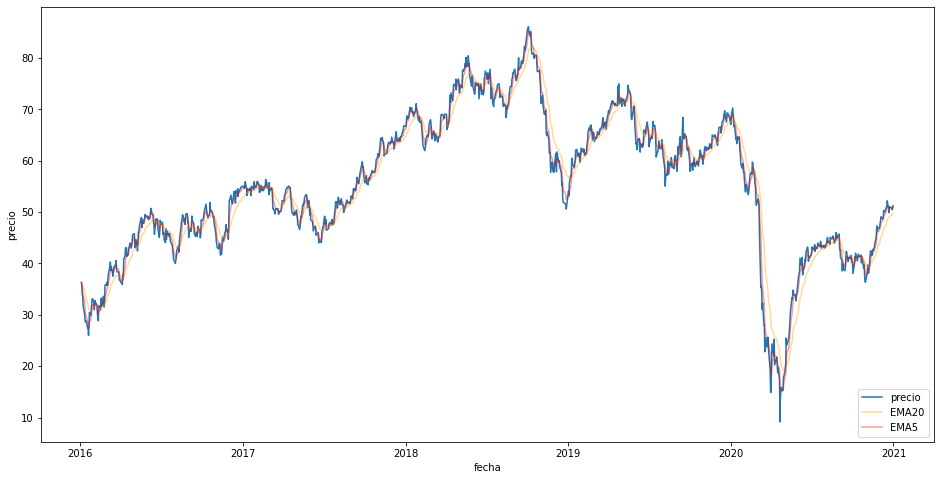

In [ ]:
# grafico de EMAs y Precios
plt.figure(figsize=(16,8))
plt.plot(dfbr['close'])
plt.plot(dfbr['EMA20'], color='orange', alpha=0.4)
plt.plot(dfbr['EMA5'], color='red', alpha=0.4)
plt.ylabel('precio')
plt.xlabel('fecha')
plt.legend(['precio','EMA20','EMA5'], loc='lower right')
plt.show()


## Senales con MACD en BTC


In [ ]:
btc=yfin.download('BTC-USD', start='2022-01-02', end='2022-04-01')
btc['MACD']= ta.trend.MACD(close=btc['Close'], window_fast= 12, window_slow=26 ).macd()

signals_macd =[0]
N=len(btc)

for i in range (1,N):
  macd = btc['MACD'][i]
  a_macd = btc['MACD'][i-1]

  if a_macd > 0 and macd < 0:
    signals_macd.append(1)
  elif a_macd < 0 and macd > 0 :
    signals_macd.append(-1)
  else:
    signals_macd.append(0)



[*********************100%***********************]  1 of 1 completed


In [ ]:
btc['signals_macd']=signals_macd
btc['buy']=np.where(btc['signals_macd']==1, btc['Close'], np.nan)
btc['sell']= np.where(btc['signals_macd']== -1, btc['Close'], np.nan)

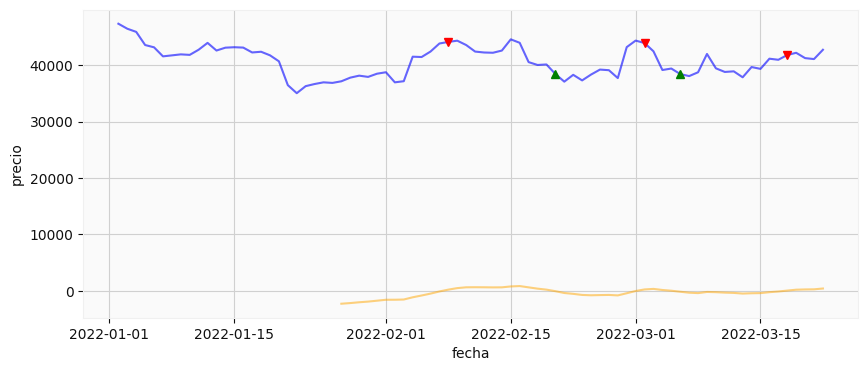

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(btc['Close'],color='blue', alpha=0.6, label='Precio')
plt.plot(btc['buy'], color='green', marker ='^', label='Compra')
plt.plot(btc['sell'], color = 'red', marker='v', label='Venta')
plt.plot(btc['MACD'], color='orange', alpha=0.5)
plt.xlabel('fecha')
plt.ylabel('precio')
plt.show()

## **Señales BB**

In [ ]:
# Señales Bollinger Bands
#indicador
bb = ta.volatility.BollingerBands(close=dfbr['close'], window = 20, window_dev=2)
dfbr['M']= bb.bollinger_mavg()
dfbr['H']= bb.bollinger_hband()
dfbr['L']= bb.bollinger_lband()
dfbr

,close,M,H,L
DATE,,,,
2019-01-02,54.06,NaN,NaN,NaN
2019-01-03,53.23,NaN,NaN,NaN
2019-01-04,55.64,NaN,NaN,NaN
2019-01-07,57.10,NaN,NaN,NaN
2019-01-08,56.91,NaN,NaN,NaN
...,...,...,...,...
2019-12-24,69.26,66.5765,70.481304,62.671696
2019-12-26,69.26,66.7880,70.791806,62.784194
2019-12-27,68.91,66.9995,70.982386,63.016614


In [ ]:
#señales

# 1 compra
# 0 mantiene
# -1 vende

N = len(dfbr)
signals_bb = [0]

for i in range (1,N):
  high = dfbr['H'][i]
  low = dfbr['L'][i]
  price = dfbr['close'][i]

  a_high = dfbr['H'][i-1]
  a_low = dfbr['L'][i-1]
  a_price = dfbr['close'][i-1]
# sell
  if a_price < a_high and price > high:
    signals_bb.append(-1)
#buy
  elif a_price > a_low and price < low:
    signals_bb.append(1)
#maintain
  else:
    signals_bb.append(0)

dfbr['signals_bb']=signals_bb

#buy and sell columns
dfbr['buy_bb']= np.where(dfbr['signals_bb']==1, dfbr['close'], np.nan)
dfbr['sell_bb']= np.where(dfbr['signals_bb']==-1, dfbr['close'], np.nan)
dfbr

,close,M,H,L,signals_macd,buy_macd,sell_macd,signals_bb,buy_bb,sell_bb
DATE,,,,,,,,,,
2019-01-02,54.06,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2019-01-03,53.23,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2019-01-04,55.64,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2019-01-07,57.10,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN
2019-01-08,56.91,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-12-24,69.26,66.5765,70.481304,62.671696,0,NaN,NaN,0,NaN,NaN
2019-12-26,69.26,66.7880,70.791806,62.784194,0,NaN,NaN,0,NaN,NaN
2019-12-27,68.91,66.9995,70.982386,63.016614,0,NaN,NaN,0,NaN,NaN


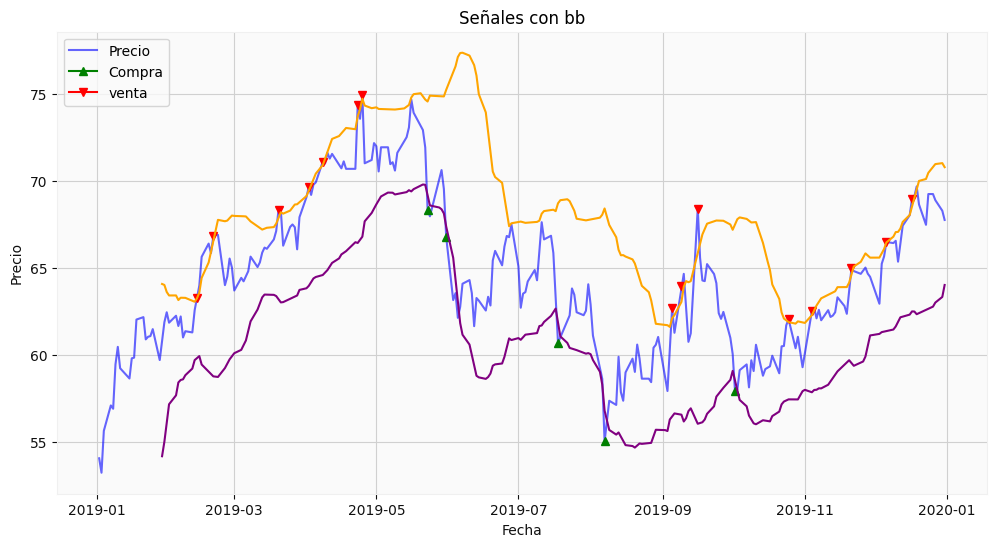

In [ ]:
#Grafico de Senales bb
plt.figure(figsize=(12,6))
plt.plot(dfbr['close'], color='blue', alpha=0.6, label='Precio')
plt.plot(dfbr['buy_bb'], color='green', marker='^', label='Compra')
plt.plot(dfbr['sell_bb'], color='red', marker='v', label='venta')
plt.plot(dfbr['H'], color='orange')
plt.plot(dfbr['L'], color='purple')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(loc='upper left')
plt.title('Señales con bb')
plt.show()

## **señales EMAs**

In [ ]:
# señales EMAs
# -1 vender
# 0 mantener
# 1 comprar

N = len(dfbr)
signals = [0]

for i in range (1, N):
  cinco = dfbr['EMA5'][i]
  veinte = dfbr['EMA20'][i]

  a_cinco = dfbr['EMA5'][i-1]
  a_veinte = dfbr['EMA20'][i-1]
# long
  if a_cinco < a_veinte and cinco > veinte:
    signals.append(1)
# short
  elif a_cinco > a_veinte and cinco < veinte :
    signals.append(-1)
# mantener
  else:
    signals.append(0)
dfbr['signals'] = signals
dfbr


,close,EMA5,EMA20,signals
DATE,,,,
2019-01-02,54.06,54.060000,54.060000,0
2019-01-03,53.23,53.783333,53.980952,0
2019-01-04,55.64,54.402222,54.138957,1
2019-01-07,57.10,55.301481,54.420961,0
2019-01-08,56.91,55.837654,54.658012,0
...,...,...,...,...
2019-12-24,69.26,68.604699,66.891005,0
2019-12-26,69.26,68.823133,67.116624,0
2019-12-27,68.91,68.852089,67.287421,0


In [ ]:
dfbr['buy'] = np.where(dfbr['signals']==1, dfbr['close'], np.nan)
dfbr['sell'] = np.where(dfbr['signals']== -1, dfbr['close'], np.nan)
dfbr

,close,EMA5,EMA20,signals,buy,sell
DATE,,,,,,
2019-01-02,54.06,54.060000,54.060000,0,NaN,NaN
2019-01-03,53.23,53.783333,53.980952,0,NaN,NaN
2019-01-04,55.64,54.402222,54.138957,1,55.64,NaN
2019-01-07,57.10,55.301481,54.420961,0,NaN,NaN
2019-01-08,56.91,55.837654,54.658012,0,NaN,NaN
...,...,...,...,...,...,...
2019-12-24,69.26,68.604699,66.891005,0,NaN,NaN
2019-12-26,69.26,68.823133,67.116624,0,NaN,NaN
2019-12-27,68.91,68.852089,67.287421,0,NaN,NaN


In [ ]:
#graficar señales
plt.figure(figsize=(16,8))
plt.plot(dfbr['close'], alpha = 0.4, label='precio')
plt.scatter(dfbr.index, dfbr['buy'], label='compra', marker='^', color = 'green')
plt.scatter(dfbr.index, dfbr['sell'], label='venta', marker = 'v', color = 'red')
plt.legend(loc= 'upper left')
plt.title('senales')
plt.xlabel('fecha')
plt.ylabel('precio/barril')
plt.show()


NameError: ignored

# **BACKTESTINN EMAS**

In [1]:
!git clone https://github.com/carive47/Finances

Cloning into 'Finances'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 100.09 KiB | 5.00 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [3]:
%cd Finances

/content/Finances


In [4]:
!git add .

In [8]:
!git config --global user.email "carive47@gmail.com"
!git config --global user.name "Camilo Ariza"
!git commit -m "organizacion inicial"

[main 81edfb0] organizacion inicial
 1 file changed, 2138 deletions(-)
 delete mode 100644 technical_forecastinganalisis_MMSFT_GOOGLE.ipynb


In [13]:

!git push origin main

Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (2/2), 225 bytes | 225.00 KiB/s, done.
Total 2 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/carive47/Finances.git
   f6cc3a7..81edfb0  main -> main
